In [1]:
import numpy as np
import matplotlib.pyplot as plt

OUTPUTS_FOLDER = '../outputs/'
experiment_filename = '2019-12-10.01-12-grads.npy'

experiment_path = OUTPUTS_FOLDER + experiment_filename

experiment = np.load(experiment_path, allow_pickle=True).item()

In [8]:
queries = experiment['results']['queries']

In [22]:
queries[queries == -1]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1])

In [35]:
queries == -1

array([False, False,  True, False, False, False, False, False,  True,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False,  True,
        True, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False])

In [14]:
products = experiment['results']['gradient_products'][8]

len(products)

5000

In [29]:
est_gradient_norms = experiment['results']['estimated_gradient_norms']

In [34]:
zero_norms = 0

for i, norms in est_gradient_norms:
    if np.linalg.norm(norms) == 0:
        zero_norms += 1
        
zero_norms

9

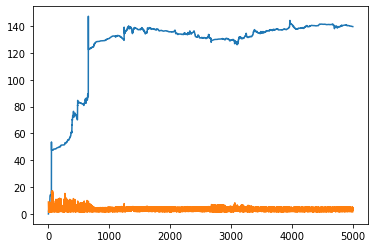

In [38]:
plt.plot(experiment['results']['estimated_gradient_norms'][8])
plt.plot(experiment['results']['true_gradient_norms'][8])

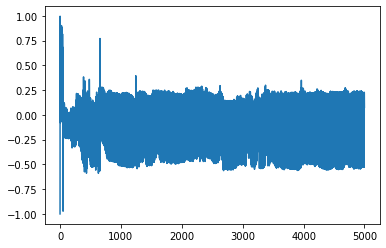

In [39]:
plt.plot(experiment['results']['gradient_products'][8])

(0, 10)

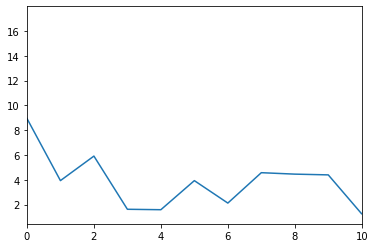

In [42]:
plt.plot(experiment['results']['true_gradient_norms'][8])
plt.xlim(0,10)

In [45]:
np.argmax(queries)

19

In [50]:
i = 1

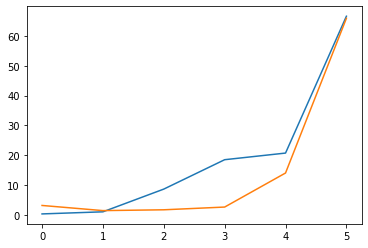

In [51]:
plt.plot(experiment['results']['estimated_gradient_norms'][i])
plt.plot(experiment['results']['true_gradient_norms'][i])

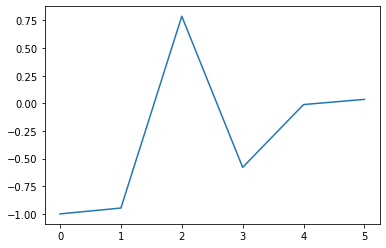

In [52]:
plt.plot(experiment['results']['gradient_products'][i])

(0, 100)

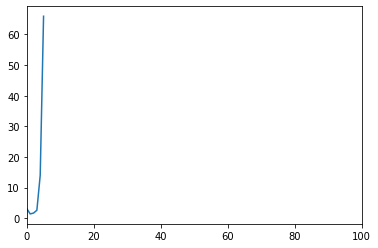

In [53]:
plt.plot(experiment['results']['true_gradient_norms'][i])
plt.xlim(0,100)